# Inventory Management Project

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing the dataset
data = pd.read_csv(r"C:\Users\Admin\Downloads\prorevenue.csv",low_memory=False )
data.head()

,Product type,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,1,14190,890,open,1,0,1,5
1,2,6064,789,open,1,0,1,5
2,3,14190,821,open,1,0,1,5
3,4,13995,456,open,1,0,1,5
4,5,4822,559,open,1,0,1,5


In [4]:
data.shape

(1017209, 8)

In [5]:
data.describe()

,Product type,Revenue,No of purchases,Promotion applied,Education Holiday,DayOfWeek
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.773832e+03,6.331444e+02,3.815145e-01,1.786467e-01,3.998341e+00
std,3.219087e+02,3.849954e+03,4.644115e+02,4.857586e-01,3.830564e-01,1.997391e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.800000e+02,3.727000e+03,4.050000e+02,0.000000e+00,0.000000e+00,2.000000e+00
50%,5.580000e+02,5.744000e+03,6.090000e+02,0.000000e+00,0.000000e+00,4.000000e+00
75%,8.380000e+02,7.856000e+03,8.370000e+02,1.000000e+00,0.000000e+00,6.000000e+00
max,1.115000e+03,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,7.000000e+00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Product type       1017209 non-null  int64 
 1   Revenue            1017209 non-null  int64 
 2   No of purchases    1017209 non-null  int64 
 3   store status       1017209 non-null  object
 4   Promotion applied  1017209 non-null  int64 
 5   Generic Holiday    1017209 non-null  object
 6   Education Holiday  1017209 non-null  int64 
 7   DayOfWeek          1017209 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 62.1+ MB


In [7]:
data.columns

Index(['Product type', 'Revenue', 'No of purchases', 'store status',
       'Promotion applied', 'Generic Holiday', 'Education Holiday',
       'DayOfWeek'],
      dtype='object')

In [8]:
# Number of unique values
for feature in data.columns:
    count = data[feature].nunique()
    print(feature, ": ", count)

Product type :  1115
Revenue :  21734
No of purchases :  4086
store status :  2
Promotion applied :  2
Generic Holiday :  4
Education Holiday :  2
DayOfWeek :  7


## Exploratory Data Analysis

In [9]:
data.isna().sum()

Product type         0
Revenue              0
No of purchases      0
store status         0
Promotion applied    0
Generic Holiday      0
Education Holiday    0
DayOfWeek            0
dtype: int64

#### There are no NA values in the dataset

In [10]:
# Encoding the "store status"

In [11]:
data["store status"] = pd.get_dummies(data["store status"], drop_first=True)

In [12]:
data["store status"].value_counts()

1    844390
0    172819
Name: store status, dtype: int64

In [13]:
# Converting the multiple categories of generic holidays into '0' and '1'

In [14]:
data["Generic Holiday"].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [15]:
data.loc[data["Generic Holiday"] == 'a',"Generic Holiday"] = 1
data.loc[data["Generic Holiday"] == 'b',"Generic Holiday"] = 1
data.loc[data["Generic Holiday"] == 'c',"Generic Holiday"] = 1
data.loc[data["Generic Holiday"] == '0',"Generic Holiday"] = 0

In [16]:
data["Generic Holiday"].unique()

array([0, 1], dtype=object)

In [17]:
data["Generic Holiday"].value_counts()

0    986159
1     31050
Name: Generic Holiday, dtype: int64

In [18]:
data["Generic Holiday"]= data["Generic Holiday"].astype(int)

In [19]:
data.describe()

,Product type,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.773832e+03,6.331444e+02,8.301047e-01,3.815145e-01,3.052470e-02,1.786467e-01,3.998341e+00
std,3.219087e+02,3.849954e+03,4.644115e+02,3.755410e-01,4.857586e-01,1.720261e-01,3.830564e-01,1.997391e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.800000e+02,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,5.580000e+02,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,8.380000e+02,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,1.115000e+03,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00


### Correlation matrix

In [20]:
correlation = data.corr()
correlation

,Product type,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
Product type,1.000000,0.005119,0.024331,-0.000039,0.000058,0.000542,0.000641,-0.000008
Revenue,0.005119,1.000000,0.894702,0.678470,0.452346,-0.254215,0.085136,-0.462120
No of purchases,0.024331,0.894702,1.000000,0.616768,0.316165,-0.226607,0.071564,-0.386447
store status,-0.000039,0.678470,0.616768,1.000000,0.295034,-0.378375,0.086166,-0.528963
Promotion applied,0.000058,0.452346,0.316165,0.295034,1.000000,-0.012353,0.067483,-0.392925
Generic Holiday,0.000542,-0.254215,-0.226607,-0.378375,-0.012353,1.000000,0.148651,-0.052889
Education Holiday,0.000641,0.085136,0.071564,0.086166,0.067483,0.148651,1.000000,-0.205388
DayOfWeek,-0.000008,-0.462120,-0.386447,-0.528963,-0.392925,-0.052889,-0.205388,1.000000


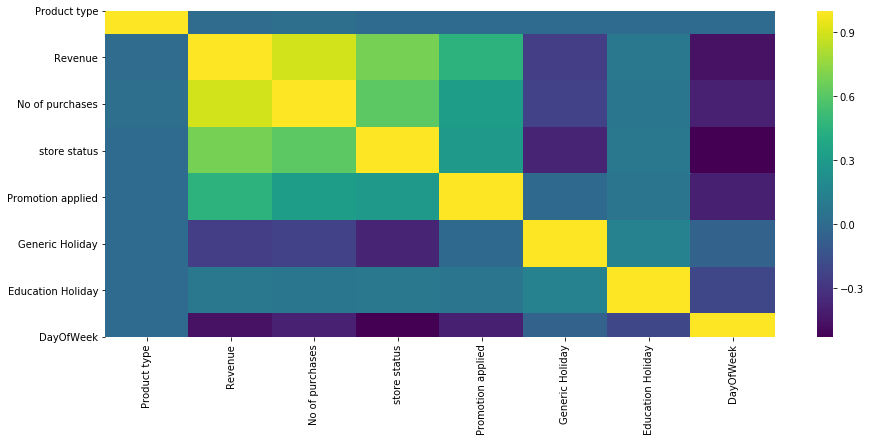

In [21]:
plt.figure(figsize = (15,6))
sns.heatmap(correlation, cbar = True, cmap = "viridis")

#### There is a high correlation between the, 
#### 1. "Revenue" and "No of purchases" -> 89.6 % correlation 
#### 2. "Revenue" and "Store status"  -> 67.8 % of correlation

### Univariate analysis

In [22]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != "O" and len(data[feature].unique())>25]
print("Number of numerical features:", len(numerical_features))

Number of numerical features: 3


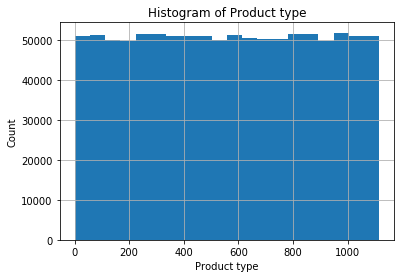

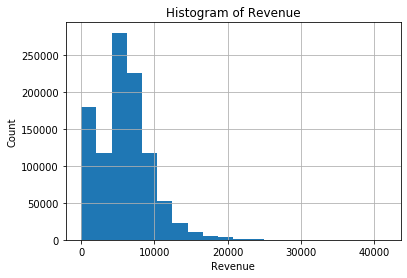

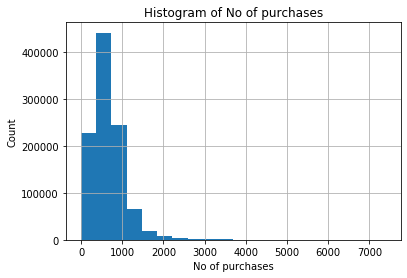

In [23]:
# Using histograms to analyze the distribution of numerical features
for feature in numerical_features:
    dataset = data.copy()
    dataset[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title("Histogram of "+ feature)
    plt.show()

#### Both "Revenue" and "Number of purchases" are right skewwed

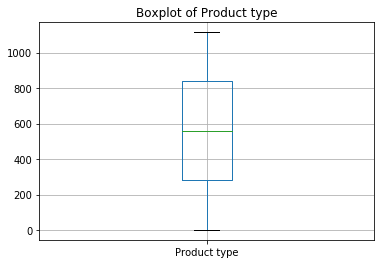

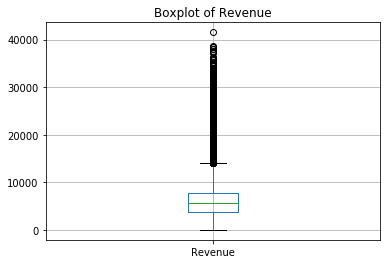

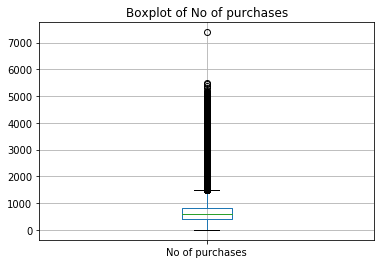

In [24]:
# Using the boxplots to identify the outliers in the dataset
for feature in numerical_features:
    data = dataset.copy()
    data.boxplot(column=feature)
    plt.title("Boxplot of "+ feature)
    plt.show()

#### There are lot of outliers in the "Revenue" and "Number of purchases"

In [25]:
# Discrete features
discrete_features = [feature for feature in data.columns if feature not in numerical_features]

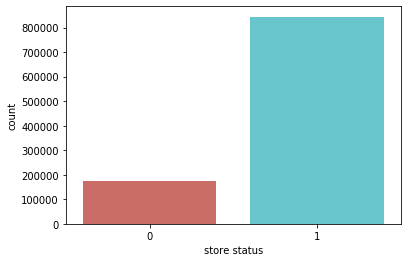

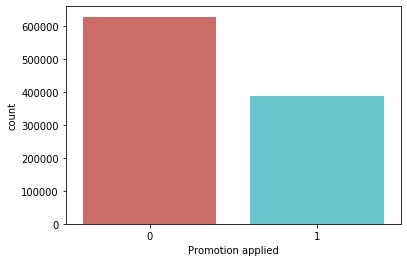

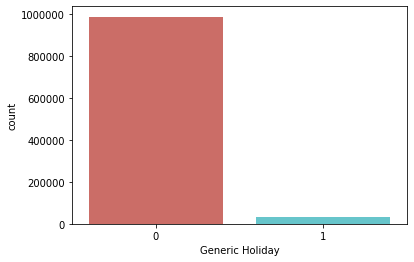

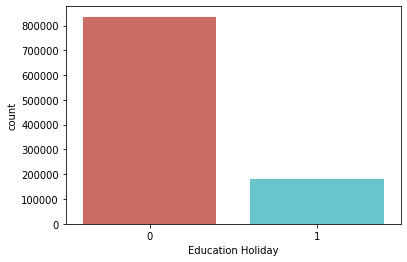

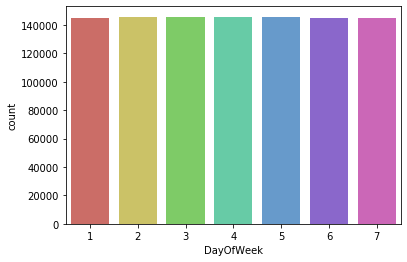

In [26]:
# Countplots for discrete features
for feature in discrete_features:
    sns.countplot(feature, data= data, palette='hls')
    plt.show()

### Bivariate analysis

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


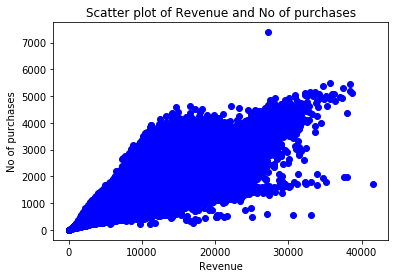

In [27]:
# Scatterplot of numerical features
plt.plot(data["Revenue"], data["No of purchases"], "bo")
plt.xlabel("Revenue")
plt.ylabel("No of purchases")
plt.title("Scatter plot of "+ "Revenue and No of purchases")
plt.show()

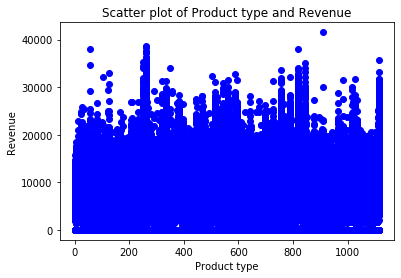

In [28]:
plt.plot(data["Product type"], data["Revenue"], "bo")
plt.xlabel("Product type")
plt.ylabel("Revenue")
plt.title("Scatter plot of "+ "Product type and Revenue")
plt.show()

#### Some products have high "Revenue" and some products have lower "Revenue"

In [29]:
# Discrete feature bivariate analysis with "Revenue"

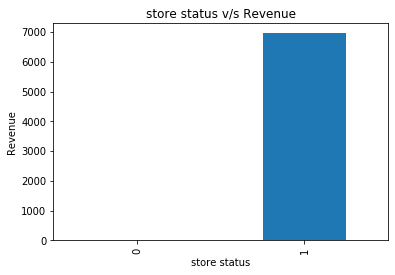

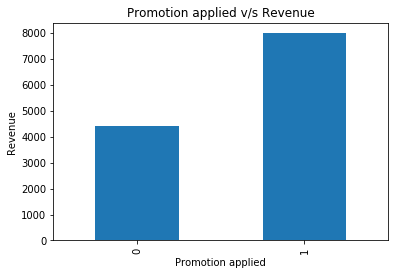

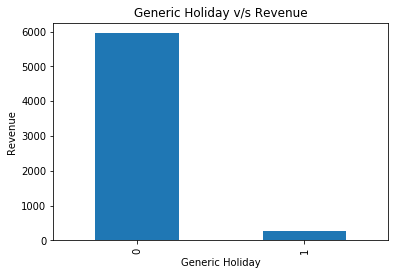

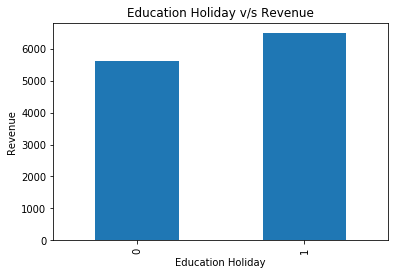

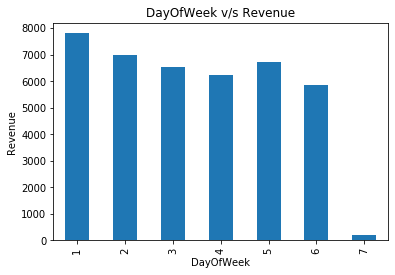

In [30]:
for feature in discrete_features:
    dataset = data.copy()
    data.groupby(feature)["Revenue"].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Revenue")
    plt.title(feature+" v/s Revenue")
    plt.show()

### Observations
1. When the promotion is applied the revenue is higher.
2. "Education Holiday" is not effecting the store status.
3. On 1st day of week the revenue is highest and it reduces gardually till weekend (6h day).
4. Store remains closed on 7th day or Sunday.

In [31]:
# Cross tabulation plot

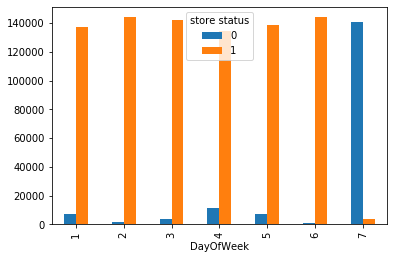

In [32]:
pd.crosstab(data["DayOfWeek"], data["store status"]).plot(kind="bar")

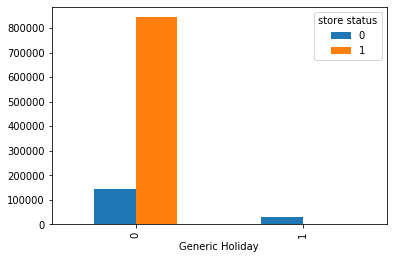

In [33]:
pd.crosstab(data["Generic Holiday"], data["store status"]).plot(kind="bar")

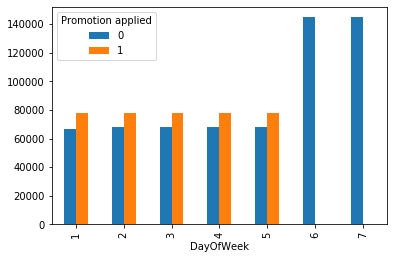

In [34]:
pd.crosstab(data["DayOfWeek"], data["Promotion applied"]).plot(kind="bar")

#### Promotion is applied only on the weekdays i.e from 1st day of week to 5th day of week

## Importing Product details dataset

In [35]:
data2 = pd.read_csv(r"C:\Users\Admin\Downloads\productdetails.csv")
data2.head()

,Unnamed: 0,product type,cost per unit,Time for delivery
0,0,1,457,11
1,1,2,1545,13
2,2,3,1910,14
3,3,4,131,9
4,4,5,868,8


In [36]:
data2.shape

(1115, 4)

In [37]:
data2.describe()

,Unnamed: 0,product type,cost per unit,Time for delivery
count,1115.00000,1115.00000,1115.000000,1115.000000
mean,557.00000,558.00000,1012.735426,9.542601
std,322.01708,322.01708,565.696913,2.857276
min,0.00000,1.00000,50.000000,5.000000
25%,278.50000,279.50000,502.500000,7.000000
50%,557.00000,558.00000,1024.000000,10.000000
75%,835.50000,836.50000,1517.500000,12.000000
max,1114.00000,1115.00000,1999.000000,14.000000


In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         1115 non-null   int64
 1   product type       1115 non-null   int64
 2   cost per unit      1115 non-null   int64
 3   Time for delivery  1115 non-null   int64
dtypes: int64(4)
memory usage: 35.0 KB


In [39]:
data.isna().sum()

Product type         0
Revenue              0
No of purchases      0
store status         0
Promotion applied    0
Generic Holiday      0
Education Holiday    0
DayOfWeek            0
dtype: int64

## Combining two datasets

In [40]:
data_full = data2.merge(data, left_on = "product type", right_on = "Product type", how = 'right')

In [41]:
data_full.head()

,Unnamed: 0,product type,cost per unit,Time for delivery,Product type,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,0,1,457,11,1,14190,890,1,1,0,1,5
1,0,1,457,11,1,5020,546,1,1,0,1,4
2,0,1,457,11,1,4782,523,1,1,0,1,3
3,0,1,457,11,1,5011,560,1,1,0,1,2
4,0,1,457,11,1,6102,612,1,1,0,1,1


In [42]:
data_full.tail()

,Unnamed: 0,product type,cost per unit,Time for delivery,Product type,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
1017204,1114,1115,454,14,1115,4771,339,1,0,0,1,6
1017205,1114,1115,454,14,1115,4540,326,1,0,0,1,5
1017206,1114,1115,454,14,1115,4297,300,1,0,0,1,4
1017207,1114,1115,454,14,1115,3697,305,1,0,0,1,3
1017208,1114,1115,454,14,1115,0,0,0,0,1,1,2


In [43]:
data_full.drop(["Unnamed: 0", "Product type"], axis = 1, inplace = True)

In [44]:
data_full.head()

,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,1,457,11,14190,890,1,1,0,1,5
1,1,457,11,5020,546,1,1,0,1,4
2,1,457,11,4782,523,1,1,0,1,3
3,1,457,11,5011,560,1,1,0,1,2
4,1,457,11,6102,612,1,1,0,1,1


In [45]:
data_full.shape

(1017209, 10)

In [46]:
data_full.columns

Index(['product type', 'cost per unit', 'Time for delivery', 'Revenue',
       'No of purchases', 'store status', 'Promotion applied',
       'Generic Holiday', 'Education Holiday', 'DayOfWeek'],
      dtype='object')

### Aggregating data based on "Day of Week"

In [82]:
data_full.groupby(by=["DayOfWeek"])[["Revenue","No of purchases",'cost per unit', 'Time for delivery']].mean()

,Revenue,No of purchases,cost per unit,Time for delivery
DayOfWeek,,,,
1,7809.044510,813.065791,1012.840227,9.543619
2,7005.244467,760.984615,1012.843915,9.543642
3,6555.884138,721.639666,1012.843559,9.543652
4,6247.575913,697.541486,1012.839425,9.543611
5,6723.368185,743.139765,1012.839425,9.543611
6,5847.562599,657.112237,1012.840227,9.543619
7,204.183189,35.786817,1012.840227,9.543619


### Adding column "Number of inventory" by dividing "Revenue" and "Cost per unit" with 10% buffer

In [89]:
data_full["No_of_inventory"] = (data_full["Revenue"] / data_full["cost per unit"])*1.10

In [92]:
data_full["No_of_inventory"] = data_full["No_of_inventory"].astype(int)

In [93]:
data_full.head()

,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek,No_of_inventory
0,1,457,11,14190,890,1,1,0,1,5,34
1,1,457,11,5020,546,1,1,0,1,4,12
2,1,457,11,4782,523,1,1,0,1,3,11
3,1,457,11,5011,560,1,1,0,1,2,12
4,1,457,11,6102,612,1,1,0,1,1,14


In [95]:
data_full.groupby(by=["DayOfWeek"])[["Revenue","No_of_inventory",'cost per unit', 'Time for delivery']].mean()

,Revenue,No_of_inventory,cost per unit,Time for delivery
DayOfWeek,,,,
1,7809.044510,15.694472,1012.840227,9.543619
2,7005.244467,14.032664,1012.843915,9.543642
3,6555.884138,13.126283,1012.843559,9.543652
4,6247.575913,12.523144,1012.839425,9.543611
5,6723.368185,13.535116,1012.839425,9.543611
6,5847.562599,11.881082,1012.840227,9.543619
7,204.183189,0.468113,1012.840227,9.543619


In [96]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   product type       1017209 non-null  int64
 1   cost per unit      1017209 non-null  int64
 2   Time for delivery  1017209 non-null  int64
 3   Revenue            1017209 non-null  int64
 4   No of purchases    1017209 non-null  int64
 5   store status       1017209 non-null  uint8
 6   Promotion applied  1017209 non-null  int64
 7   Generic Holiday    1017209 non-null  int32
 8   Education Holiday  1017209 non-null  int64
 9   DayOfWeek          1017209 non-null  int64
 10  No_of_inventory    1017209 non-null  int32
dtypes: int32(2), int64(8), uint8(1)
memory usage: 78.6 MB


### Checking the product types with highest and lowest "Revenue"

In [103]:
# Top 10 product types with highest revenue

In [101]:
data_full.groupby(["product type"])[['cost per unit', 'Time for delivery', 'Revenue','No_of_inventory']].mean().sort_values("Revenue", ascending = False).head(10)

,cost per unit,Time for delivery,Revenue,No_of_inventory
product type,,,,
262,827.0,6.0,20718.515924,27.065817
817,1385.0,12.0,18108.139066,13.966030
562,112.0,8.0,17969.556263,175.983015
1114,1232.0,13.0,17200.196391,14.938429
251,1627.0,9.0,15814.087049,10.294055
842,326.0,9.0,15242.114776,51.027704
513,1781.0,13.0,15129.942675,8.917197
788,1578.0,11.0,14949.194268,10.023355
733,1034.0,10.0,14933.288747,15.401274


In [105]:
# Top 10 product types with lowest revenue

In [102]:
data_full.groupby(["product type"])[['cost per unit', 'Time for delivery', 'Revenue','No_of_inventory']].mean().sort_values("Revenue", ascending = True).head(10)

,cost per unit,Time for delivery,Revenue,No_of_inventory
product type,,,,
307,1058.0,8.0,2244.503185,1.935244
543,203.0,5.0,2313.468153,12.124204
198,755.0,10.0,2407.933121,3.109342
208,771.0,14.0,2443.791932,3.060510
841,372.0,7.0,2461.395966,6.871550
254,378.0,12.0,2485.839703,6.809979
972,416.0,10.0,2550.559448,6.368365
794,117.0,5.0,2553.475584,23.597665
219,1742.0,9.0,2591.467091,1.233546


In [97]:
data_full.columns

Index(['product type', 'cost per unit', 'Time for delivery', 'Revenue',
       'No of purchases', 'store status', 'Promotion applied',
       'Generic Holiday', 'Education Holiday', 'DayOfWeek', 'No_of_inventory'],
      dtype='object')

### Seperating input and output variables

In [107]:
X = data_full.drop(columns= ['No of purchases','Education Holiday','No_of_inventory'])
y = data_full['No_of_inventory']

In [108]:
X.head()

,product type,cost per unit,Time for delivery,Revenue,store status,Promotion applied,Generic Holiday,DayOfWeek
0,1,457,11,14190,1,1,0,5
1,1,457,11,5020,1,1,0,4
2,1,457,11,4782,1,1,0,3
3,1,457,11,5011,1,1,0,2
4,1,457,11,6102,1,1,0,1


In [109]:
y.head()

0    34
1    12
2    11
3    12
4    14
Name: No_of_inventory, dtype: int32

### Scaling the input data

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler=MinMaxScaler()

In [113]:
scaler.fit(X)

MinMaxScaler()

In [114]:
scaled_data = pd.DataFrame(scaler.transform(X),columns=X.columns)

In [115]:
scaled_data.head()

,product type,cost per unit,Time for delivery,Revenue,store status,Promotion applied,Generic Holiday,DayOfWeek
0,0.0,0.208825,0.666667,0.341508,1.0,1.0,0.0,0.666667
1,0.0,0.208825,0.666667,0.120815,1.0,1.0,0.0,0.500000
2,0.0,0.208825,0.666667,0.115087,1.0,1.0,0.0,0.333333
3,0.0,0.208825,0.666667,0.120599,1.0,1.0,0.0,0.166667
4,0.0,0.208825,0.666667,0.146856,1.0,1.0,0.0,0.000000


### Splitting the data into train and test data

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 96)

In [122]:
print(X_train.shape,"\n",
X_test.shape)


(813767, 8) 
 (203442, 8)


### Using OLS model to check p-values

In [123]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [124]:
est = sm.OLS(y, X).fit()

In [125]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        No_of_inventory   R-squared (uncentered):                   0.514
Model:                            OLS   Adj. R-squared (uncentered):              0.514
Method:                 Least Squares   F-statistic:                          1.344e+05
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                        13:27:46   Log-Likelihood:                     -4.3032e+06
No. Observations:             1017209   AIC:                                  8.606e+06
Df Residuals:                 1017201   BIC:                                  8.606e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
product type          0.0022   4.93e-05     45.539      0.000       0.002       0.002
cost per unit        -0.0168   2.81e-05   -597.278      0.000      -0.017      -0.017
Time for delivery     0.2949      0.005     58.947      0.000       0.285       0.305
Revenue               0.0021   6.27e-06    333.340      0.000       0.002       0.002
store status          6.9799      0.058    120.002      0.000       6.866       7.094
Promotion applied     1.1609      0.039     29.836      0.000       1.085       1.237
Generic Holiday       7.6305      0.102     74.642      0.000       7.430       7.831
DayOfWeek             1.3939      0.008    175.617      0.000       1.378       1.409
==============================================================================
Omnibus:                  1173594.631   Durbin-Watson:                   0.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        153684132.745
Skew:                           6.034   Prob(JB):                         0.00
Kurtosis:                      61.995   Cond. No.                     4.40e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### All the p-values are less than 0.05, hence they are significant

### Using Random Forest regressor to find important features

In [126]:
from sklearn.ensemble import RandomForestRegressor 

In [127]:
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0) 

In [128]:
regressor.fit(X, y) 

RandomForestRegressor(n_estimators=20, random_state=0)

In [129]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)

In [130]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [131]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cost per unit        Importance: 0.65
Variable: Revenue              Importance: 0.35
Variable: product type         Importance: 0.0
Variable: Time for delivery    Importance: 0.0
Variable: store status         Importance: 0.0
Variable: Promotion applied    Importance: 0.0
Variable: Generic Holiday      Importance: 0.0
Variable: DayOfWeek            Importance: 0.0


## Linear regression

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [133]:
reg = LinearRegression()

In [135]:
model = reg.fit(X_train, y_train)

In [136]:
print('Intercept: ', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept:  21.004670671847116
Coefficients: 
 [-0.00044757 -0.01835505 -0.25068378  0.00202027  0.04828794  0.05869742
  0.09607982  0.03227134]


In [138]:
# predicting trained values
y_pred1 = model.predict(X_train)

In [139]:
# predicting test values
y_pred2 = model.predict(X_test)

Text(0, 0.5, 'Fitted values')

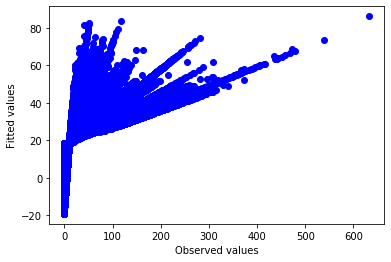

In [140]:
# Observed values v/s fitted values
plt.scatter(y_train, y_pred1, c="b");plt.xlabel("Observed values");plt.ylabel("Fitted values")

In [ ]:
# RMSE value

In [141]:
print("RMSE for training data: ",np.sqrt(metrics.mean_squared_error(y_train,y_pred1)))

RMSE for training data:  16.417216637833246


In [142]:
print("RMSE for testing data: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

RMSE for testing data:  16.03955310343


## Random Forest Regressor

In [143]:
from sklearn.ensemble import RandomForestRegressor 

In [144]:
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)

In [145]:
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=20, random_state=0)

In [146]:
# Predicting the values using the model

In [147]:
Y_pred1 = regressor.predict(X_train) 

In [148]:
Y_pred2 = regressor.predict(X_test) 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


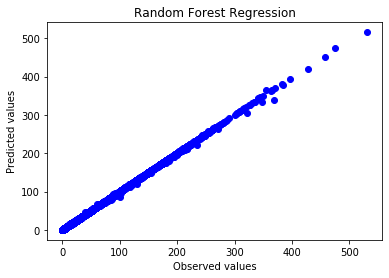

In [149]:
# plot predicted data 
plt.plot(y_test,Y_pred2,'bo')  
plt.title('Random Forest Regression') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [150]:
# RMSE values

In [151]:
print('RMSE of training data:', np.sqrt(metrics.mean_squared_error(y_train, Y_pred1)))

RMSE of training data: 0.08448273014778955


In [152]:
print('RMSE of testing data:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred2)))

RMSE of testing data: 0.16658828437731305


## XG Boost Regressor

In [153]:
from xgboost.sklearn import XGBRegressor

C:\Users\Admin\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [154]:
xg_reg = XGBRegressor() 

In [155]:
xg_reg.fit(X_train, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [156]:
# Predicting the values using the model

In [157]:
y_pred_xg1 = xg_reg.predict(X_train) 

In [158]:
y_pred_xg2 = xg_reg.predict(X_test) 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


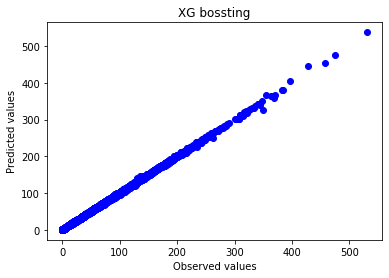

In [159]:
# plot predicted data 
plt.plot(y_test,y_pred_xg2,"bo")  
plt.title('XG bossting') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [160]:
# RMSE values

In [161]:
print('RMSE Training data:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_xg1)))

RMSE Training data: 0.3832454310510727


In [162]:
print('RMSE Testing data:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_xg2)))

RMSE Testing data: 0.4066658805918103


### Hyper parameter tuning for XG Boosting

In [163]:
import xgboost

In [164]:
regressor=xgboost.XGBRegressor()

In [165]:
booster=['gbtree']
base_score=[0.5]

In [166]:
n_estimators = [100, 200]
max_depth = [3, 4]
learning_rate=[0.1,0.2]

In [167]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'booster':booster,
    'base_score':base_score
    }

In [168]:
from sklearn.model_selection import RandomizedSearchCV

In [175]:
# Set up the random search with 3-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=3, n_iter=20,
            scoring = 'neg_root_mean_squared_error',n_jobs = 3,
            verbose = 5, 
            return_train_score = True,
            random_state=36)

In [176]:
random_cv.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  6.4min
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed: 12.9min remaining:    0.0s
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed: 12.9min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [177]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [178]:
regressor = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1,  monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [179]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
# Predicting the output values

In [181]:
y_pred_xgb1 = regressor.predict(X_train)

In [182]:
y_pred_xgb2 = regressor.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


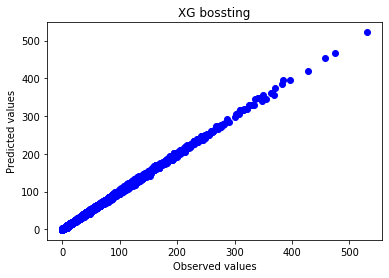

In [183]:
# plot predicted data 
plt.plot(y_test,y_pred_xgb2,"bo")  
plt.title('XG bossting') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [184]:
# RMSE values

In [185]:
print('RMSE of training data:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_xgb1)))

RMSE of training data: 0.5490242069683807


In [186]:
print('RMSE of testing data:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgb2)))

RMSE of testing data: 0.5493776324083857


#### "Random Forest Regressor" with RMSE of 0.16 is the best model

### Creating the pickle file of the model

In [188]:
import pickle
with open('model_rf_inventory.pkl','wb') as f:
    pickle.dump(regressor,f)

In [190]:
# Load from file
with open('model_rf_inventory.pkl', 'rb') as file:
    pickle_model = pickle.load(file)

In [191]:
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 99.93 %
